# **Запълване на 4-свързана област**
#### **Домашна работа №3**
#### **Вариант №1**

## **Метод с рекурсия за вътрешно-определена област**

Кодът визуализира и оцветява пръстен в двумерна пикселна мрежа.
- $x$ и $y$ са координатите на всяка клетка в изображението с размер $size × size$;
- $dist$ е квадратното Евклидово разстояние на всяка точка до центъра $(c_x, c_y)$;
- $dist(x,y)=(x−c_x)^2+(y−c_y)^2$ - класически начин за дефиниране на кръгова маска в пикселна мрежа.

Алгоритъм:
- Запълва свързана област, започвайки от дадена точка;

$$
f(x,y) =
\begin{cases} 
\text{replacement\_color}, & \text{if } img[x,y] = \text{target\_color} \\
\text{unchanged}, & \text{else}
\end{cases}
$$

- Условия за спиране: ако излезем извън границите на изображението или попаднем на точка, която **не** е `target color`.

## **Разлика с методи за гранично-определена област**

#### Вътрешно-определена област
- Областта е дефинирана чрез нейното съдържание, т.е. чрез стойностите или условията вътре в областта;
- Значи **не** се налагат ограничения на границата. Алгоритъмът знае къде да действа само по вътрешното съдържание;
- Тук, всички сини пиксели трябва да бъдат оцветени. Вътрешната област е сините пикселите.
  $$Ω_{internal}=\{(x,y)∣f(x,y)=100\}$$
#### Гранично-определена област
- Областта е дефинирана чрез границата, която **не** трябва да се преминава;
- Алгоритъмът продължава да запълва докато достигне границата, която е специален цвят или стойност;
- Тук, ако ползвахме метод с рекурсия за гранично-определена област, запълването започва от точка вътре в пръстена и спира когато достигне черните пиксели.
  $$Ω_{boundary}=\{(x,y)∣f(x,y)≠0\}$$

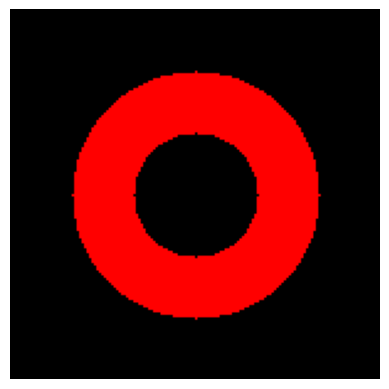

Готово!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
import time
import sys
sys.setrecursionlimit(100000)

size = 150
img = np.zeros((size, size), dtype=np.uint8)

cx, cy = size // 2, size // 2
R_outer = 50
R_inner = 25

Y, X = np.ogrid[:size, :size]
dist = (X - cx)**2 + (Y - cy)**2

mask_outer = dist <= R_outer**2 # всички точки вътре в големия кръг
mask_inner = dist <= R_inner**2 # всички точки вътре в малкия кръг
ring_mask = mask_outer & (~mask_inner) # разлика на множествата, така че получаваме само пръстен между двата кръга

border_color = 100
fill_color = 200
img[ring_mask] = border_color

# 0 = черно, 100 = синьо, 200 = червено
cmap = ListedColormap([
    (0,0,0),     
    (0,0,1),     
    (1,0,0)      
])
bounds = [0, 50, 150, 255]
norm = plt.matplotlib.colors.BoundaryNorm(bounds, cmap.N)

def flood_fill(x, y, target_color, replacement_color):
    if x < 0 or x >= img.shape[1] or y < 0 or y >= img.shape[0]:
        return
    if img[y, x] != target_color:
        return

    img[y, x] = replacement_color

    clear_output(wait=True)
    plt.imshow(img, cmap=cmap, norm=norm)
    plt.axis('off')
    plt.show()
    
    time.sleep(0.00001)

    flood_fill(x + 1, y, target_color, replacement_color)
    flood_fill(x - 1, y, target_color, replacement_color)
    flood_fill(x, y + 1, target_color, replacement_color)
    flood_fill(x, y - 1, target_color, replacement_color)

px = int(input("x = "))
py = int(input("y = "))

if img[py, px] != border_color:
    print("Началната точка трябва да е в синята зона!")
else:
    flood_fill(px, py, border_color, fill_color)
    print("Готово!")